In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv('../data/dataset.csv')

In [5]:
# Look at first 5 songs
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [6]:
# look at column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [7]:
df.drop(['Unnamed: 0', 'track_id'] , axis=1, inplace=True)


In [8]:
# Show stats of dataframe
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


#### Issues
* duration of 0ms doesnt make sense
* negative minimum loudness of track
* popularity is 0? could be worth looking at

* 0 for many min values
* instrumentalness - very skewed!

In [9]:
# Show how many values are 0
zero_duration_count = df['duration_ms'].eq(0).sum()
zero_tempo_count = df['tempo'].eq(0).sum()

print(zero_duration_count)
print(zero_tempo_count)



1
157


In [10]:
# Drop unimportant rows with 0s
df.drop(df[(df.duration_ms == 0) | (df.tempo == 0)].index, inplace=True)

In [11]:
# Check shape, ensure rows dropped
df.shape

(113842, 19)

In [12]:
# Convert duration_ms -> duration_min
df['duration_min'] = df['duration_ms']/60000
df.drop('duration_ms', axis=1, inplace=True)

In [13]:
# Drop rows with 'NULL' values
df.dropna(how='any', axis=0, inplace=True)

In [14]:
# Verify Shape
df.shape

(113842, 19)

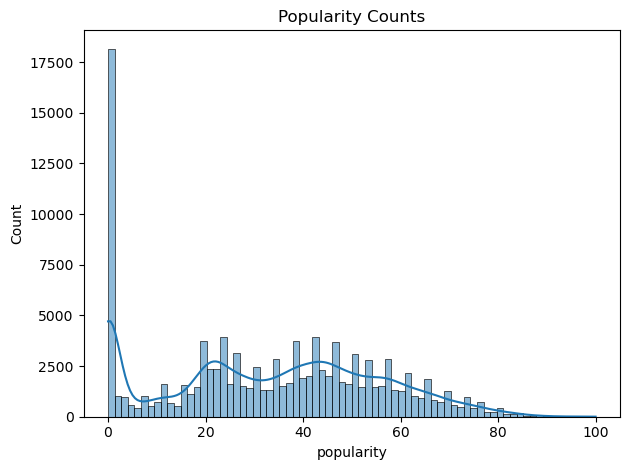

In [15]:
# KDE histogram of popularity
sns.histplot(df['popularity'], kde=True)
plt.title('Popularity Counts')
plt.tight_layout()

* 18000 tracks with rating-0 is suspicious. 
* possible Spotify hasn't scored them yet

* bimodal at 20 - 45
* long tail to the right

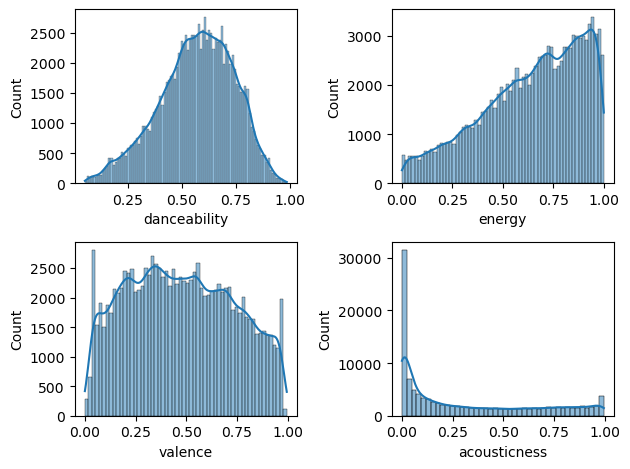

In [16]:
# Plot distribution of core audio features
plt.subplot(2, 2, 1)
sns.histplot(df['danceability'], kde=True)

plt.subplot(2, 2, 2)
sns.histplot(df['energy'], kde=True)

plt.subplot(2, 2, 3)
sns.histplot(df['valence'], kde=True)

plt.subplot(2, 2, 4)
sns.histplot(df['acousticness'], kde=True)

plt.tight_layout()
plt.show()

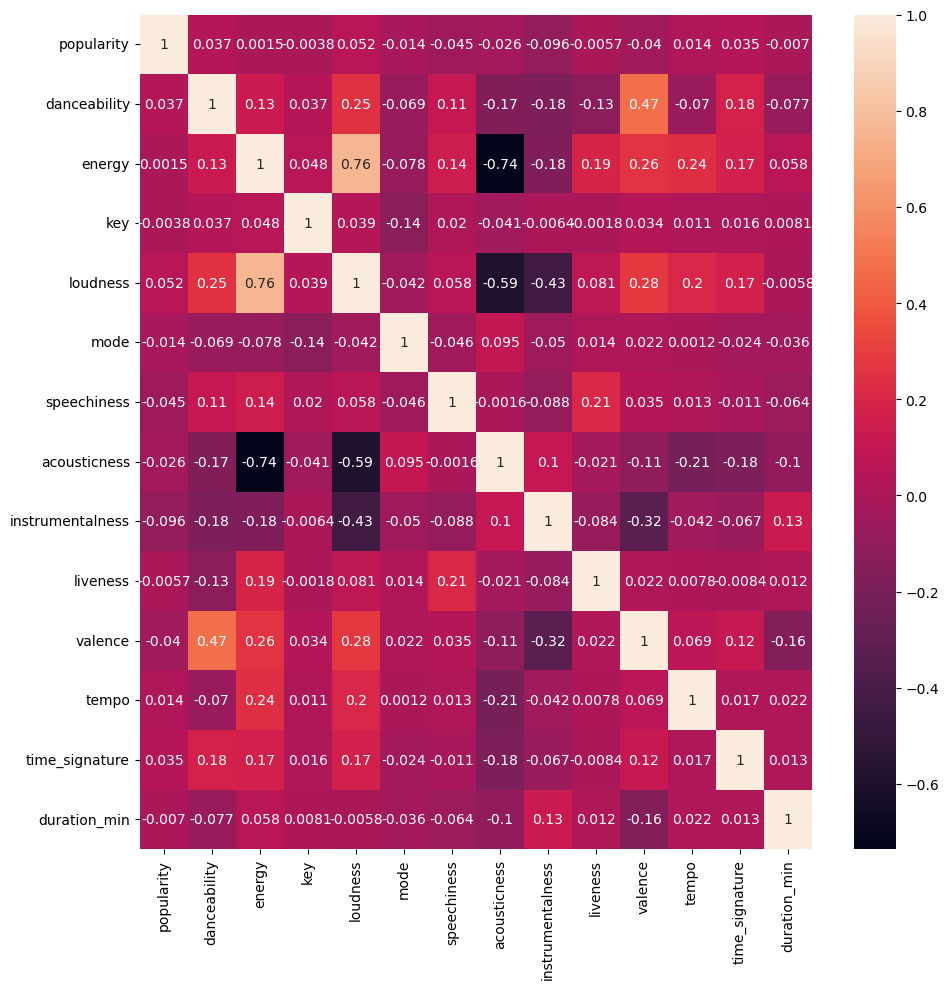

In [17]:
# Correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

plt.tight_layout()
plt.show()

### Strong correlations

* energy & loudness: 0.76 — louder tracks are more energetic
* energy & acousticness: -0.74 — acoustic tracks tend to be low energy
* loudness & acousticness: -0.59 — acoustic tracks are quieter
* danceability & valence: 0.47 — happier songs tend to be more danceable

In [18]:
# Value Counts for track genre
df['track_genre'].value_counts()


track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
anime          1000
               ... 
ambient         997
world-music     997
guitar          996
iranian         996
sleep           862
Name: count, Length: 114, dtype: int64

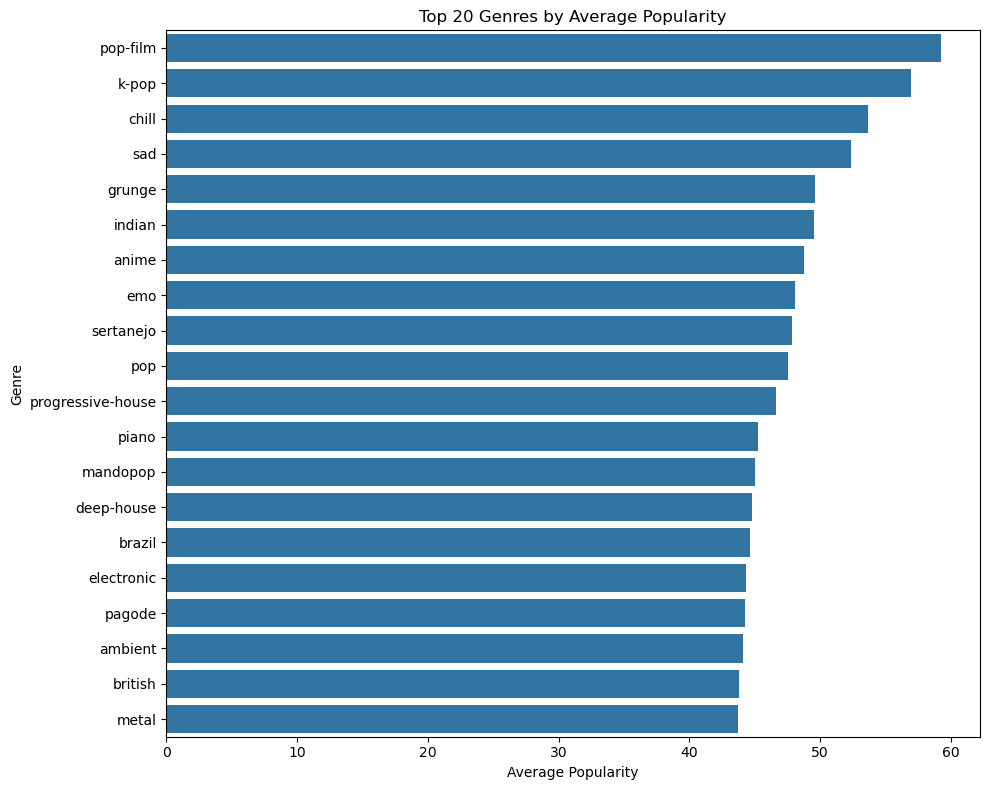

In [19]:
# Visualize top 20 genres by popularity
genre_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 8))
sns.barplot(x=genre_popularity.values, y=genre_popularity.index)
plt.title('Top 20 Genres by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

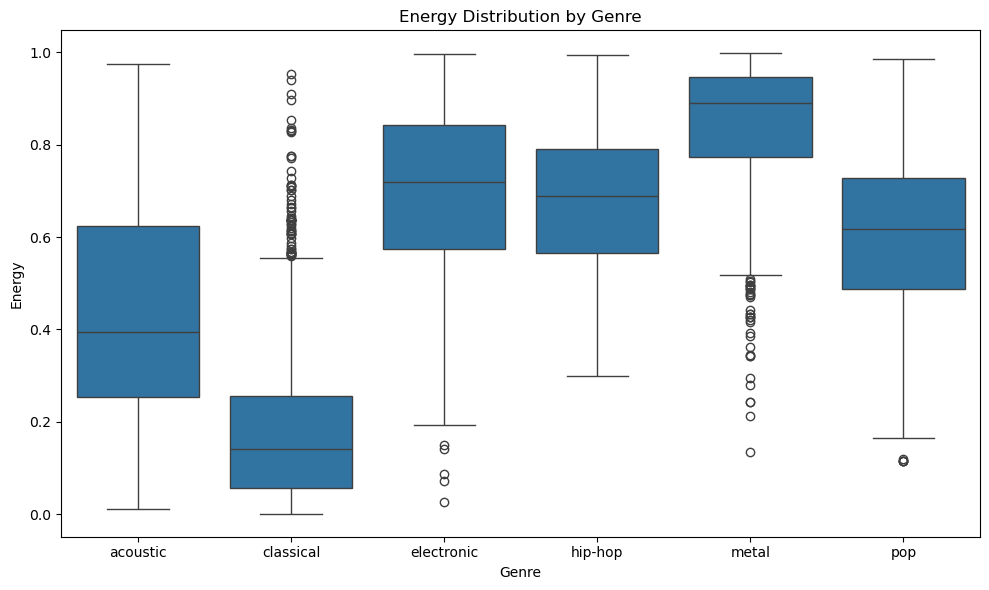

In [ ]:
# Display energy distribution by genre
selected_genres = ['pop', 'metal', 'acoustic', 'electronic', 'classical', 'hip-hop']
df_filtered = df[df['track_genre'].isin(selected_genres)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='track_genre', y='energy', data=df_filtered)
plt.title('Energy Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Energy')
plt.tight_layout()
plt.show()